In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import os

In [2]:
# Load the data
mortality_state = gpd.read_file("./output_shpfile/mortality_perState_perYear_shp/mortality_perDistrict_perMonth_shp.shp")
mortality_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  26 non-null     object  
 1   lgd_sta_na  26 non-null     object  
 2   pc11_st_id  26 non-null     object  
 3   pc11_st_na  26 non-null     object  
 4   deaths      26 non-null     float64 
 5   year        26 non-null     float64 
 6   geometry    26 non-null     geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 1.5+ KB


In [3]:
mortality_state["year"] = mortality_state["year"].astype(int)
mortality_state["deaths"] = mortality_state["deaths"].astype(int)
mortality_state = mortality_state[mortality_state["year"].isin([2018, 2019, 2020, 2021])]
mortality_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 23 entries, 0 to 25
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  23 non-null     object  
 1   lgd_sta_na  23 non-null     object  
 2   pc11_st_id  23 non-null     object  
 3   pc11_st_na  23 non-null     object  
 4   deaths      23 non-null     int64   
 5   year        23 non-null     int64   
 6   geometry    23 non-null     geometry
dtypes: geometry(1), int64(2), object(4)
memory usage: 1.4+ KB


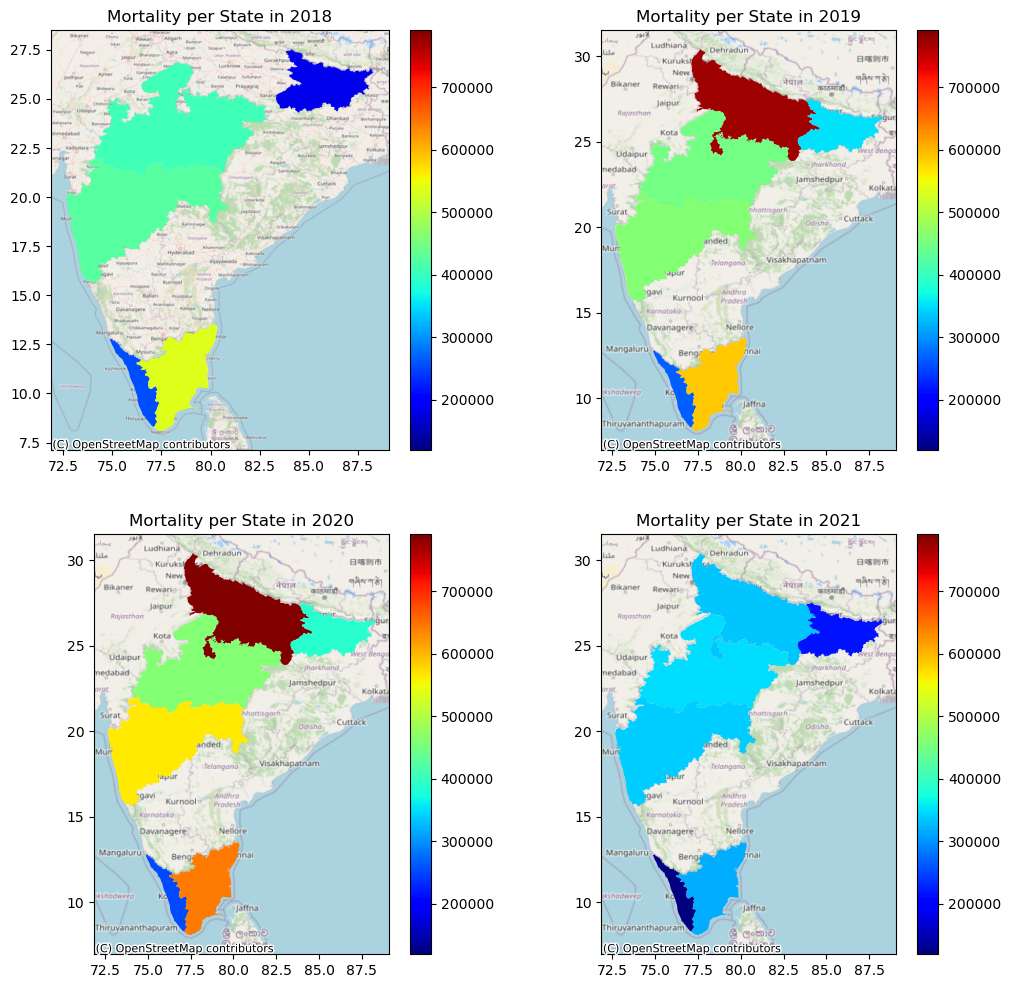

In [4]:
mortality_state_2018 = mortality_state[mortality_state["year"] == 2018]
mortality_state_2019 = mortality_state[mortality_state["year"] == 2019]
mortality_state_2020 = mortality_state[mortality_state["year"] == 2020]
mortality_state_2021 = mortality_state[mortality_state["year"] == 2021]

vmin = mortality_state["deaths"].min()
vmax = mortality_state["deaths"].max()

# plot choropleth
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
mortality_state_2018.plot(column="deaths", cmap="jet", ax=ax[0][0], legend=True, vmin=vmin, vmax=vmax)
mortality_state_2019.plot(column="deaths", cmap="jet", ax=ax[0][1], legend=True, vmin=vmin, vmax=vmax)
mortality_state_2020.plot(column="deaths", cmap="jet", ax=ax[1][0], legend=True, vmin=vmin, vmax=vmax)
mortality_state_2021.plot(column="deaths", cmap="jet", ax=ax[1][1], legend=True, vmin=vmin, vmax=vmax)

ax[0][0].set_title("Mortality per State in 2018")
ax[0][1].set_title("Mortality per State in 2019")
ax[1][0].set_title("Mortality per State in 2020")
ax[1][1].set_title("Mortality per State in 2021")

cx.add_basemap(ax[0][0], crs=mortality_state_2018.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
cx.add_basemap(ax[0][1], crs=mortality_state_2019.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
cx.add_basemap(ax[1][0], crs=mortality_state_2020.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
cx.add_basemap(ax[1][1], crs=mortality_state_2021.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.show()

In [5]:
covid_state = gpd.read_file("./output_shpfile/covid_total_mortality_perState_perYear_shp/covid_total_mortality_perState_perYear_shp.shp")
covid_state["year"] = covid_state["year"].astype(int)
covid_state["total_case"] = covid_state["total_case"].astype(int)
covid_state["total_deat"] = covid_state["total_deat"].astype(int)
covid_state["new_cases"] = covid_state["new_cases"].astype(int)
covid_state["new_deaths"] = covid_state["new_deaths"].astype(int)

covid_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  12 non-null     object  
 1   lgd_sta_na  12 non-null     object  
 2   pc11_st_id  12 non-null     object  
 3   pc11_st_na  12 non-null     object  
 4   year        12 non-null     int64   
 5   total_case  12 non-null     int64   
 6   total_deat  12 non-null     int64   
 7   new_cases   12 non-null     int64   
 8   new_deaths  12 non-null     int64   
 9   geometry    12 non-null     geometry
dtypes: geometry(1), int64(5), object(4)
memory usage: 1.1+ KB


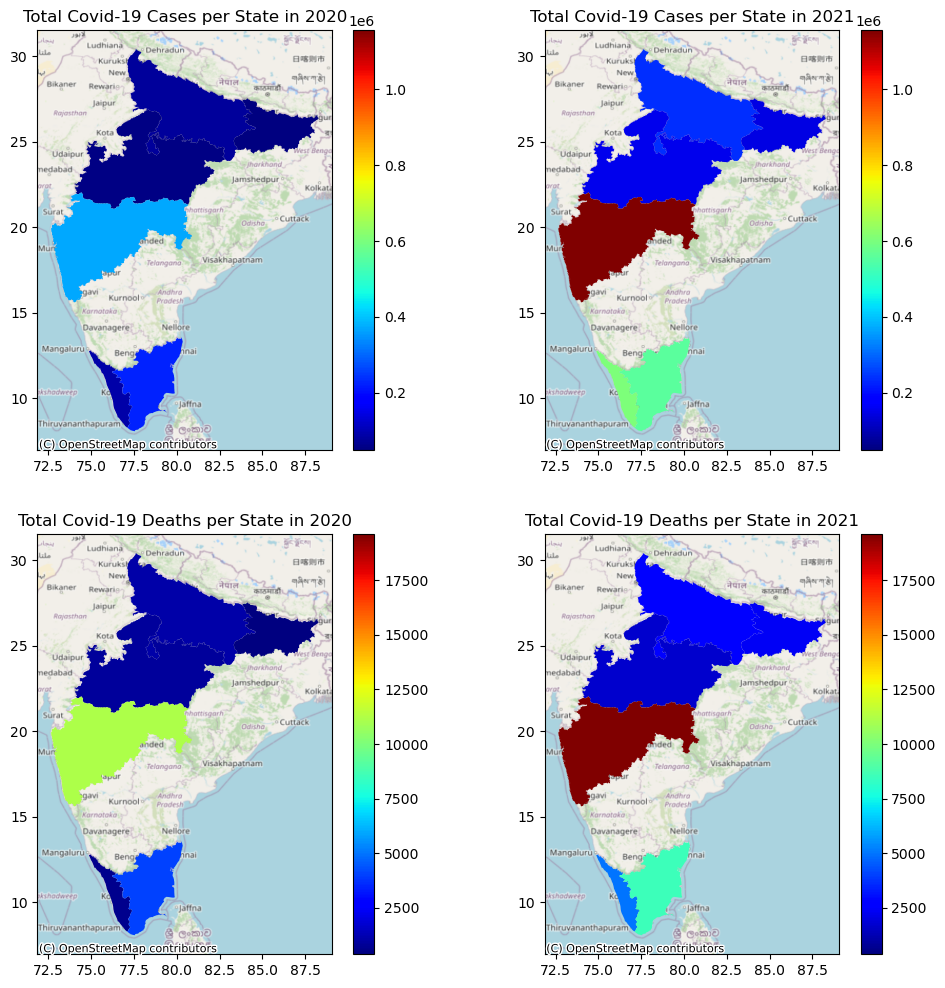

In [6]:
covid_state_2020 = covid_state[covid_state["year"] == 2020]
covid_state_2021 = covid_state[covid_state["year"] == 2021]

vmax_total_cases = covid_state["total_case"].max()
vmax_total_deaths = covid_state["total_deat"].max()
vmin_total_cases = covid_state["total_case"].min()
vmin_total_deaths = covid_state["total_deat"].min()

# plot choropleth
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
covid_state_2020.plot(column="total_case", cmap="jet", ax=ax[0][0], legend=True, vmin=vmin_total_cases, vmax=vmax_total_cases)
covid_state_2021.plot(column="total_case", cmap="jet", ax=ax[0][1], legend=True, vmin=vmin_total_cases, vmax=vmax_total_cases)
covid_state_2020.plot(column="total_deat", cmap="jet", ax=ax[1][0], legend=True, vmin=vmin_total_deaths, vmax=vmax_total_deaths)
covid_state_2021.plot(column="total_deat", cmap="jet", ax=ax[1][1], legend=True, vmin=vmin_total_deaths, vmax=vmax_total_deaths)


ax[0][0].set_title("Total Covid-19 Cases per State in 2020")
ax[0][1].set_title("Total Covid-19 Cases per State in 2021")
ax[1][0].set_title("Total Covid-19 Deaths per State in 2020")
ax[1][1].set_title("Total Covid-19 Deaths per State in 2021")

cx.add_basemap(ax[0][0], crs=covid_state_2020.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
cx.add_basemap(ax[0][1], crs=covid_state_2021.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
cx.add_basemap(ax[1][0], crs=covid_state_2020.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
cx.add_basemap(ax[1][1], crs=covid_state_2021.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.show()

In [7]:
hospital_beds_state = gpd.read_file("./output_shpfile/hospital_bed_state_shp/hospital_bed_state_shp.shp")
hospital_beds_state["hospit_bed"] = hospital_beds_state["hospit_bed"].astype(int)
hospital_beds_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  6 non-null      object  
 1   lgd_sta_na  6 non-null      object  
 2   pc11_st_id  6 non-null      object  
 3   pc11_st_na  6 non-null      object  
 4   hospit_bed  6 non-null      int64   
 5   geometry    6 non-null      geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 416.0+ bytes


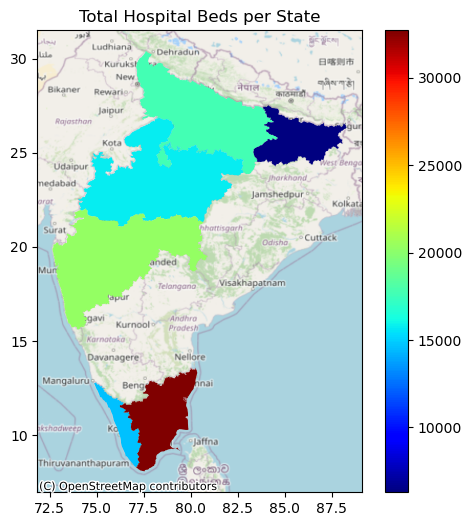

In [8]:
# plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
hospital_beds_state.plot(column="hospit_bed", cmap="jet", ax=ax, legend=True)

ax.set_title("Total Hospital Beds per State")

cx.add_basemap(ax, crs=covid_state_2020.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.show()

In [9]:
# Merge them all
merged = mortality_state.merge(covid_state, on=["lgd_sta_id", "year"], how="left")
merged = merged.merge(hospital_beds_state, on="lgd_sta_id", how="left")

merged

,lgd_sta_id,lgd_sta_na_x,pc11_st_id_x,pc11_st_na_x,deaths,year,geometry_x,lgd_sta_na_y,pc11_st_id_y,pc11_st_na_y,total_case,total_deat,new_cases,new_deaths,geometry_y,lgd_sta_na,pc11_st_id,pc11_st_na,hospit_bed,geometry
0,09,uttar pradesh,09,uttar pradesh,771383,2019,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,uttar pradesh,09,uttar pradesh,17651,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
1,09,uttar pradesh,09,uttar pradesh,791485,2020,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",uttar pradesh,09,uttar pradesh,78257.0,1111.0,0.0,0.0,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",uttar pradesh,09,uttar pradesh,17651,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
2,09,uttar pradesh,09,uttar pradesh,333878,2021,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",uttar pradesh,09,uttar pradesh,238839.0,2651.0,160582.0,1540.0,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",uttar pradesh,09,uttar pradesh,17651,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
3,10,bihar,10,bihar,182921,2018,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,bihar,10,bihar,6291,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
4,10,bihar,10,bihar,351274,2019,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,bihar,10,bihar,6291,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
5,10,bihar,10,bihar,387429,2020,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",bihar,10,bihar,48910.0,380.0,0.0,0.0,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",bihar,10,bihar,6291,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
6,10,bihar,10,bihar,215746,2021,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",bihar,10,bihar,147007.0,2334.0,98097.0,1954.0,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",bihar,10,bihar,6291,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
7,23,madhya pradesh,23,madhya pradesh,407123,2018,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,madhya pradesh,23,madhya pradesh,15769,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
8,23,madhya pradesh,23,madhya pradesh,449740,2019,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,madhya pradesh,23,madhya pradesh,15769,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
9,23,madhya pradesh,23,madhya pradesh,460691,2020,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",madhya pradesh,23,madhya pradesh,54918.0,873.0,0.0,0.0,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",madhya pradesh,23,madhya pradesh,15769,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."


In [10]:
merged = merged[["lgd_sta_id", "lgd_sta_na", "pc11_st_id", "pc11_st_na", "year", "deaths", "total_case", "total_deat", "new_cases", "new_deaths", "hospit_bed", "geometry"]]
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  23 non-null     object  
 1   lgd_sta_na  23 non-null     object  
 2   pc11_st_id  23 non-null     object  
 3   pc11_st_na  23 non-null     object  
 4   year        23 non-null     int64   
 5   deaths      23 non-null     int64   
 6   total_case  12 non-null     float64 
 7   total_deat  12 non-null     float64 
 8   new_cases   12 non-null     float64 
 9   new_deaths  12 non-null     float64 
 10  hospit_bed  23 non-null     int64   
 11  geometry    23 non-null     geometry
dtypes: float64(4), geometry(1), int64(3), object(4)
memory usage: 2.3+ KB


In [11]:
merged = gpd.GeoDataFrame(merged, geometry="geometry")
os.mkdir("./Final_output_shpfile")
merged.to_file("./Final_output_shpfile/Final_output_shpfile.shp", driver="ESRI Shapefile")